Nama: Rendy Ryan Renaldi

NIM: 1104223097


Kelas: TF-46-02

Pendahuluan, saya memiliki data nilai mahasiswa yang terdiri dari 634 data. Terdapat 7 variabel penilaian, yaitu nilai Test 1, Exam 1, Test 2, Exam 2, Test 3, Exam 3 dan anual score. Selain itu ada 2 variabel yang mengindikasikan gender dan indikasi lulus/tidak (Akan lulus jika nilai rata-rata diatas 70)



Dari data tersebut, saya akan membuat  **Prediksi Annual Score Berdasarkan Nilai Tes dan Ujian**

Oleh karena itu, saya akan membagi 2 data tersebut menjad Data Training dan Testing. Lalu setelah itu saya akan menggunakan feedforwardnet dengan beberapa neuron di hidden layer, misalnya mulai dengan 10 neuron.

**Langkah Pertama**

Masukkan File ke dalam google collab dan namai File CSV tersebut menjadi Data_Train. Setelah itu lakukan pengecekkan dengan menampilkan file head, apakah file tersebut sudah terbaca atau belum

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
Data_Train = 'NilaiMahasiswa.csv'

try:
    data = pd.read_csv(Data_Train)
    print(data.head())

except FileNotFoundError:
    print(f"Error: File not found at '{Data_Train}'. Please provide the correct path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{Data_Train}' is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the file '{Data_Train}'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

  Gender  Test_01  Exam_01  Test_02  Exam_02  Test_03  Exam_03  Annual_Score  \
0      F    72.50    93.75    81.25    86.25    100.0    86.25         87.36   
1      F    68.75    81.25    65.00    56.25     90.0    71.25         71.25   
2      F    67.50    58.75    42.50    45.00     85.0    50.00         55.83   
3      F    58.75    87.50    75.00    76.25    100.0    81.25         80.42   
4      F    90.00    83.75    70.00    93.75     90.0    88.75         86.94   

   Success  
0        1  
1        1  
2        1  
3        1  
4        1  


Dari output tersebut, dapat dilihat bahwa file sudah bisa terbaca oleh program

**Langkah kedua**

Pisahkan data untuk training dan testing dari variabel-variabel yang dinyatakan sebagai x (Test_01, Exam_01, Test_02, Exam_02, Test_03, Exam_03). Lalu nyatakan Annual_score dengan y

In [2]:
# Pilih kolom input dan kolom target
X = data [['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03']]
y = data ['Annual_Score']

# Split data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Langkah ketiga**

Buatkan model sequential dan buatlah layer input dan hidden pertama dengan 10 neuron. Lalu buat output layer dengan 1 neuron untuk prediksi annual score

Lakukan kompilasi untuk mendapat regresi dan lakukan model training

In [3]:
# Membuat model Sequential
model = Sequential()

# Menambahkan layer input dan hidden layer pertama dengan 10 neuron
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))

# Menambahkan output layer dengan 1 neuron untuk prediksi Annual Score
model.add(Dense(1))

# Compile model dengan optimizer dan loss function untuk regresi
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train model dengan data training
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2332.0986 - mae: 44.5532 - val_loss: 2231.4409 - val_mae: 43.6807
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2250.3130 - mae: 44.2746 - val_loss: 2217.7766 - val_mae: 43.5466
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2242.0828 - mae: 43.7835 - val_loss: 2203.7493 - val_mae: 43.4105
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2311.0679 - mae: 44.3252 - val_loss: 2189.2332 - val_mae: 43.2706
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2256.1809 - mae: 43.8500 - val_loss: 2174.1233 - val_mae: 43.1259
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2207.4749 - mae: 43.4443 - val_loss: 2158.2839 - val_mae: 42.9759
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2233.7722 - mae: 43.3026 - val_loss: 2141.7148 - val_mae: 42.8198
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2156.3098 - mae: 42.7620 - val_loss: 2124.1602 - val_mae: 42.6564

Dapat dilihat dari output diatas bahwa model berhasil kita latih

**Langkah Keempat**

Selanjutnya, saya akan melakukan evaluasi model menggunakan data testing yang sudah disiapkan pada langkah kedua

Selain itu, saya juga akan menampilkan plot grafik untuk melihat keakuratan model tersebut

Mean Absolute Error (MAE) pada data testing: 13.64


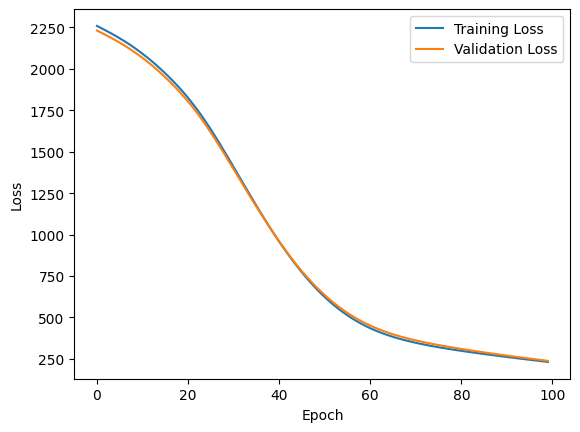

In [4]:
# Evaluasi model menggunakan data testing
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error (MAE) pada data testing: {mae:.2f}")

import matplotlib.pyplot as plt

# Plot grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Langkah Kelima**

Setelah mendapatkan MAE (Mean Absolute Error) dari model yang telah dibuat sebelumnya. Kita akan melakukan prediksi terhadap data testing. Dengan melakukan visualisasi juga antara prediksi dengan data aktual (sebenarnya)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


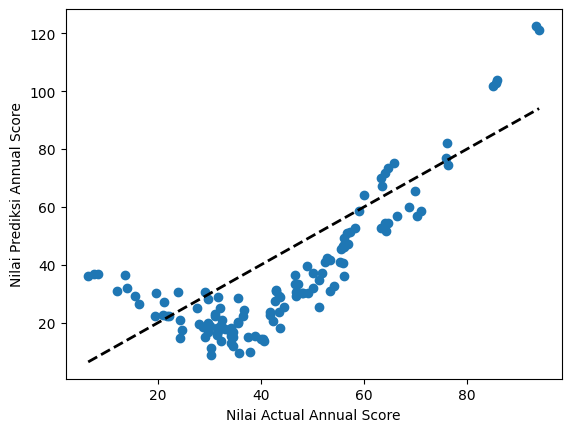

In [5]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Visualisasi hasil prediksi vs aktual
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Actual Annual Score")
plt.ylabel("Nilai Prediksi Annual Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Didapatkan plotingan seperti diatas

**Langkah Terakhir**

Pada tahap ini, pemodelan menggunakan struktur JST untuk melakukan prediksi terhadap Nilai Actuall Annual Score sudah berhasil dibuat

Namun untuk mempermudah pemahaman akan model yang telah dibuat, berikut berbagai macam bentuk visualisasi data prediksi vs data aktualnya

In [8]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Menampilkan beberapa hasil prediksi dalam bentuk angka
prediksi_vs_aktual = pd.DataFrame({'Nilai Aktual': y_test.values, 'Nilai Prediksi': y_pred.flatten()})
print(prediksi_vs_aktual.head(10))
print(prediksi_vs_aktual.tail(10))  # Tampilkan 10 contoh pertama

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Nilai Aktual  Nilai Prediksi
0         24.58       17.459719
1         43.48       23.797174
2         13.61       36.466366
3         42.98       31.435713
4         46.53       33.380867
5         30.28        8.767426
6         57.22       51.345161
7         20.90       22.448904
8         64.72       54.268219
9          6.39       36.048859
     Nilai Aktual  Nilai Prediksi
117         31.46       15.532829
118         48.19       30.097595
119         53.47       41.746090
120         34.17       18.254019
121         56.94       47.164101
122         22.08       22.198500
123         31.39       16.249037
124         16.25       26.545424
125         59.03       58.740135
126         32.15       19.005964


Output di atas adalah perbandingan nilai prediksi, menggunakan angka. Data tersebut merupakan 10 data pertama (head) dan 10 data terakhir (tail)

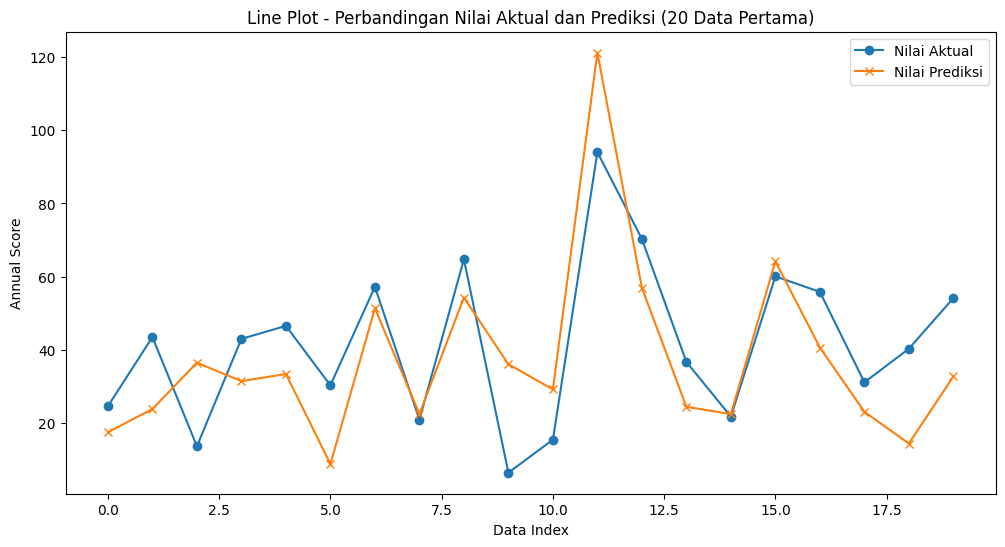

In [10]:
# Line plot: Menampilkan nilai prediksi vs nilai aktual dalam urutan
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:20], label='Nilai Aktual', marker='o')  # Menampilkan 20 data pertama untuk kejelasan
plt.plot(y_pred[:20], label='Nilai Prediksi', marker='x')
plt.xlabel("Data Index")
plt.ylabel("Annual Score")
plt.title("Line Plot - Perbandingan Nilai Aktual dan Prediksi (20 Data Pertama)")
plt.legend()
plt.show()

Visualisasi diatas merupakan perbandingan antara data prediksi dan data aktual menggunakan scatterplot

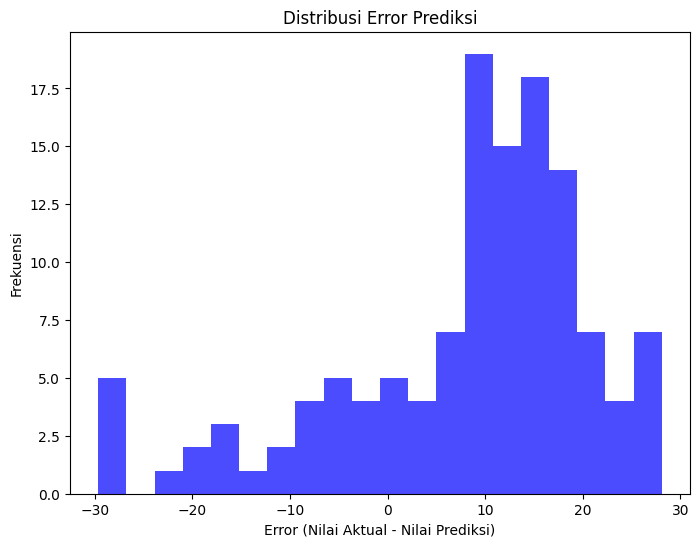

In [11]:
# Menghitung error
error = y_test.values - y_pred.flatten()

# Plot distribusi error
plt.figure(figsize=(8, 6))
plt.hist(error, bins=20, alpha=0.7, color='blue')
plt.xlabel("Error (Nilai Aktual - Nilai Prediksi)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Error Prediksi")
plt.show()


Visualisasi di atas merupakan Histogram. Di mana histogram tersebut menunjukkan distribusi error. Jika model akurat, kebanyakan error akan mendekati 0. Histogram yang berpusat di sekitar 0 menandakan error kecil dan prediksi yang cukup baik.

**Kata Penutup**

Dari data Nilai Mahasiswa tersebut, saya membuat sebuah  pemodelan menggunakan struktur JST. Dimana pemodelan ini digunakan untuk meprediksi nilai actual score mahasiswa tersebut, dengan melakukan pemisahan data ( untuk training dan untuk testing)